# Clustering (군집분석)
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

In [127]:
import pandas as pd 
data = pd.read_csv('fa_data_bfi.csv')

In [128]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [129]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='Neuroticism', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [130]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='Extraversion', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [131]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='Conscientiousness', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [132]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='Agreeableness', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [133]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='Openess', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [134]:
data # 이상치를 제거한 후 dataset

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042
...,...,...,...,...,...
2430,1.092840,1.097992,-0.112657,-0.021475,-0.893170
2431,1.308046,-1.152403,-0.104197,-1.146411,0.412042
2432,0.732472,0.252206,-0.587511,-0.317781,1.025564
2433,-0.223267,0.721169,0.787110,-1.058480,0.925103


In [135]:
data.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,0.003113,0.030340,0.025799,0.054182,0.003259
std,0.913940,0.836298,0.821891,0.764686,0.808914
min,-2.011680,-2.287489,-2.320576,-2.107187,-2.294768
25%,-0.718653,-0.498024,-0.526410,-0.439648,-0.570231
50%,-0.056327,0.097684,0.088043,0.142092,0.025512
75%,0.650523,0.655036,0.634843,0.614244,0.609261
max,2.551124,2.336969,1.893386,2.179653,2.011314


In [136]:
data_1 = data # for Hierarchical clustering

In [137]:
data_2 = data # for K-means clustering

# 계층적 클러스터링 (Hierarchical Clustering)

In [138]:
from scipy.cluster.hierarchy import linkage, dendrogram
clusters = linkage(y=data_1, method='complete', metric='euclidean')
clusters

# 연결방식 (method = 부분에 다음 중 선택할 수 있음)
# 1. single
# 2. complete
# 3. average
# 4. centroid
# 5. ward

array([[4.81000000e+02, 1.30100000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.90000000e+01, 1.86100000e+03, 4.59376453e-02, 2.00000000e+00],
       [1.28500000e+03, 1.59000000e+03, 7.45645519e-02, 2.00000000e+00],
       ...,
       [4.66000000e+03, 4.66100000e+03, 6.05411923e+00, 1.34600000e+03],
       [4.66400000e+03, 4.66600000e+03, 6.19551077e+00, 1.71700000e+03],
       [4.66500000e+03, 4.66700000e+03, 6.70802093e+00, 2.33500000e+03]])

In [139]:
pd.DataFrame(clusters)

,0,1,2,3
0,481.0,1301.0,0.000000,2.0
1,79.0,1861.0,0.045938,2.0
2,1285.0,1590.0,0.074565,2.0
3,369.0,370.0,0.123417,2.0
4,998.0,1387.0,0.137012,2.0
...,...,...,...,...
2329,4649.0,4663.0,5.500293,371.0
2330,4658.0,4662.0,5.719935,618.0
2331,4660.0,4661.0,6.054119,1346.0
2332,4664.0,4666.0,6.195511,1717.0


In [140]:
clusters.shape

(2334, 4)

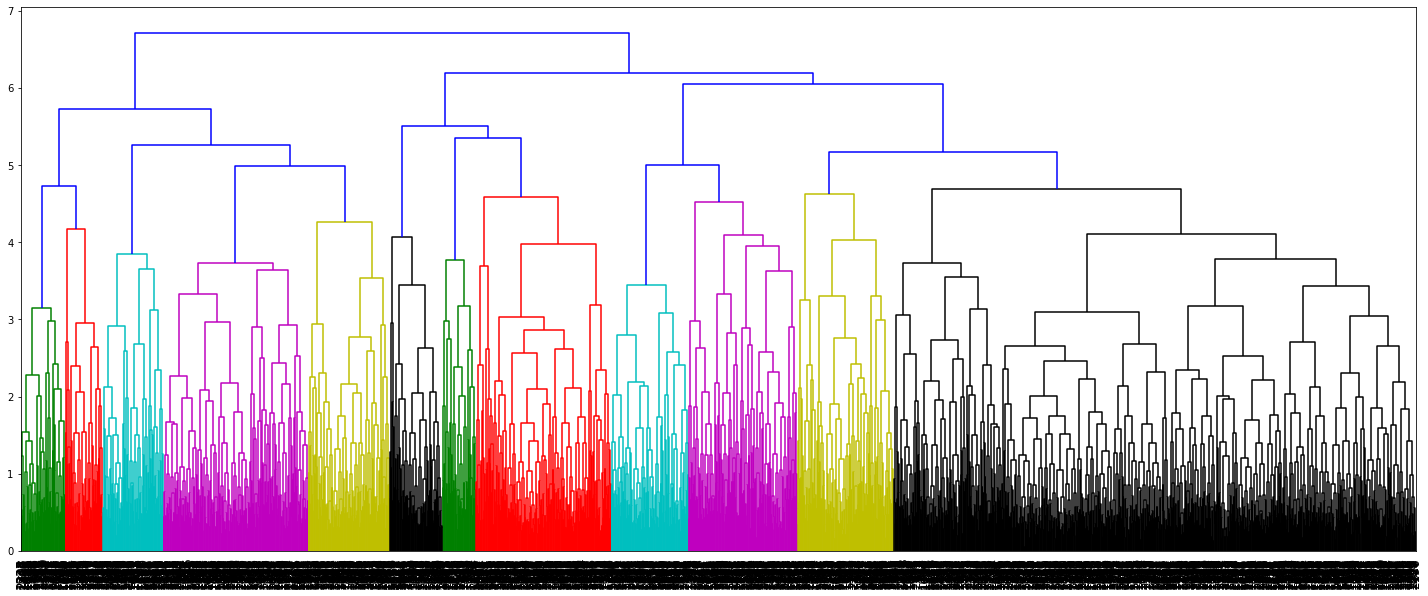

In [141]:
# 덴드로그램 시각화 : 군집수 결정
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show()

In [142]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
cut_tree = fcluster(clusters, t=6, criterion='distance') # 본 실습에서는 6 (y축)에서 cut
cut_tree # prediction

array([1, 4, 4, ..., 1, 1, 3], dtype=int32)

In [143]:
data_1['hc_cluster'] = cut_tree
data_1

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,hc_cluster
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449,1
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384,4
2,0.520534,0.318235,0.025646,-0.751136,0.204503,4
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492,4
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042,2
...,...,...,...,...,...,...
2430,1.092840,1.097992,-0.112657,-0.021475,-0.893170,4
2431,1.308046,-1.152403,-0.104197,-1.146411,0.412042,3
2432,0.732472,0.252206,-0.587511,-0.317781,1.025564,1
2433,-0.223267,0.721169,0.787110,-1.058480,0.925103,1


In [144]:
data_1['hc_cluster'].value_counts()

4    1034
1     618
2     371
3     312
Name: hc_cluster, dtype: int64

In [145]:
# 군집별 통계(평균)
cluster_g = data_1.groupby('hc_cluster')
cluster_g.mean()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
hc_cluster,,,,,
1,-0.191705,0.329659,-0.567524,-0.269873,-0.045973
2,0.096140,-0.700607,0.295047,-0.022240,-0.656149
3,-0.178624,-0.945919,-0.052009,-0.153375,0.637769
4,0.141012,0.408285,0.307288,0.337911,0.077822


In [146]:
# 군집별 통계(표준편차)
cluster_g.std()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
hc_cluster,,,,,
1,0.831127,0.708960,0.723076,0.803087,0.803042
2,0.965645,0.661490,0.794417,0.656493,0.724239
3,0.730403,0.607876,0.839600,0.993995,0.544200
4,0.961902,0.579415,0.676695,0.570642,0.729008


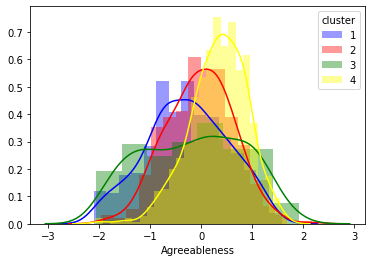

In [147]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_1[data_1.hc_cluster == 1]["Agreeableness"], 
             color="blue", label=1)

sns.distplot(data_1[data_1.hc_cluster == 2]["Agreeableness"], 
             color="red", label=2)

sns.distplot(data_1[data_1.hc_cluster == 3]["Agreeableness"], 
             color="green", label=3)

sns.distplot(data_1[data_1.hc_cluster == 4]["Agreeableness"], 
             color="yellow", label=4)

plt.legend(title="cluster")
plt.show()

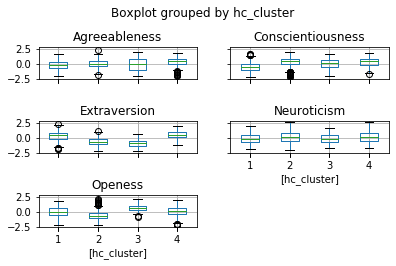

In [148]:
# 시각화방법 2
import matplotlib.pyplot as plt
data_1.boxplot(by='hc_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.title("Cluster별 Factor의 Box Plot")
plt.show()

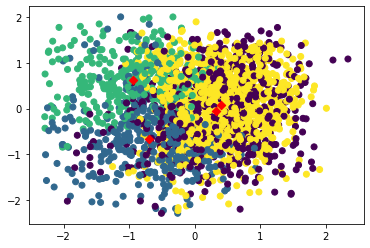

In [149]:
# 시각화방법 3
plt.scatter(x=data_1['Extraversion'], y=data_1['Openess'], c=data_1['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,1], y=hc_centers[:,4], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

- Cluster1: 외향적(E)인데, 성실하지 않은(-C) 사람
- Cluster2: 신경질적(N)인데 성실하고(C) 개방적이지 않은(-O) 사람
- Cluster3: 개방적(O)인데 외향적이지 않은(-E) 사람
- Cluster4: 외향적인데(E) 성실하고(C) 쾌활한(A) 사람

In [153]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_1, data_1['hc_cluster'])

data_1['silhouette_coeff'] = score_samples
average_score = silhouette_score(data_1, data_1['hc_cluster'])
print('데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

데이터셋 Silhouette Analysis Score:0.216


In [155]:
# 군집별 평균 silhouette_score 값
data_1.groupby('hc_cluster')['silhouette_coeff'].mean()

hc_cluster
1    0.202591
2    0.173522
3    0.165938
4    0.255773
Name: silhouette_coeff, dtype: float64

# k-평균 클러스터링 (K-means Clustering)

In [180]:
data = pd.read_csv('fa_data_bfi.csv')
outlier_idx = get_outlier(df=data, column='Neuroticism', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=data, column='Extraversion', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=data, column='Conscientiousness', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=data, column='Agreeableness', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=data, column='Openess', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)
data
data_2 = data # for K-means clustering

In [181]:
data_2_elbow = data_2

In [182]:
data_2

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042
...,...,...,...,...,...
2430,1.092840,1.097992,-0.112657,-0.021475,-0.893170
2431,1.308046,-1.152403,-0.104197,-1.146411,0.412042
2432,0.732472,0.252206,-0.587511,-0.317781,1.025564
2433,-0.223267,0.721169,0.787110,-1.058480,0.925103


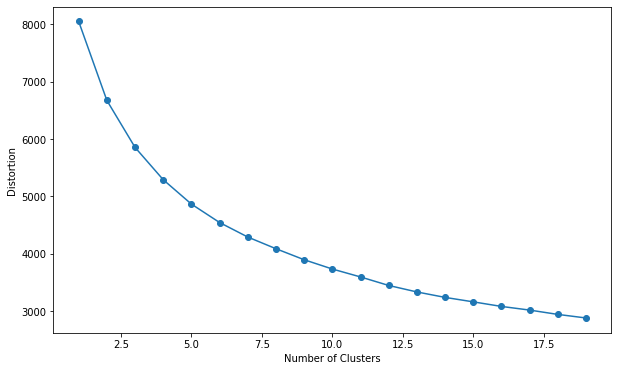

In [183]:
from sklearn.cluster import KMeans
# graph를 통해 k값 선정
# distortion = 군집내 오차제곱합(SSE; Sum of Suqared Errors)
distortions = []
for i in range(1,20):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(data_2_elbow) # elbow 계산할 dataset 적기
    # inertia는 군집내 분산을 의미
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [184]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=20210330, algorithm='auto')
# n_clusters=4 : 군집의 개수 (k)
# random_state=20210330 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(data_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20210330, tol=0.0001, verbose=0)

In [185]:
# 각 군집(cluster) 표시
pred = model.predict(data_2)
pred

array([1, 1, 0, ..., 0, 2, 3])

In [186]:
# 4. 원형 데이터에 군집 예측치 추가
data_2['k_means_cluster'] = pred
data_2

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,k_means_cluster
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449,1
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384,1
2,0.520534,0.318235,0.025646,-0.751136,0.204503,0
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492,1
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042,1
...,...,...,...,...,...,...
2430,1.092840,1.097992,-0.112657,-0.021475,-0.893170,0
2431,1.308046,-1.152403,-0.104197,-1.146411,0.412042,3
2432,0.732472,0.252206,-0.587511,-0.317781,1.025564,0
2433,-0.223267,0.721169,0.787110,-1.058480,0.925103,2


In [187]:
# 군집별 centroid
centers = model.cluster_centers_
centers

array([[ 1.05876195e+00,  4.41375732e-01, -5.23508394e-04,
         1.58039632e-01,  7.03886052e-02],
       [-3.54777260e-01, -1.00723767e-01, -3.29409449e-01,
         9.93378461e-03, -8.56768374e-01],
       [-6.88200257e-01,  4.62673879e-01,  3.74287863e-01,
         3.36557450e-01,  3.58646156e-01],
       [ 2.20901111e-01, -9.89708703e-01, -4.60399740e-02,
        -4.59938681e-01,  4.29746069e-01]])

In [188]:
pd.DataFrame(centers)
#0: Neuroticism
#1: Extraversion
#2: Conscientiousness
#3: Agreeableness
#4: Openess

,0,1,2,3,4
0,1.058762,0.441376,-0.000524,0.158040,0.070389
1,-0.354777,-0.100724,-0.329409,0.009934,-0.856768
2,-0.688200,0.462674,0.374288,0.336557,0.358646
3,0.220901,-0.989709,-0.046040,-0.459939,0.429746


In [191]:
# 군집별 통계(평균)
cluster_k = data_2.groupby('k_means_cluster')
cluster_k.mean()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
k_means_cluster,,,,,
0,1.057526,0.439731,-0.002368,0.159734,0.071547
1,-0.354777,-0.100724,-0.329409,0.009934,-0.856768
2,-0.688200,0.462674,0.374288,0.336557,0.358646
3,0.220623,-0.990761,-0.043852,-0.463374,0.429086


In [192]:
# 군집별 통계(표준편차)
cluster_k.std()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
k_means_cluster,,,,,
0,0.540778,0.661829,0.830978,0.686342,0.713959
1,0.648104,0.685167,0.810865,0.717678,0.546460
2,0.526125,0.565153,0.670782,0.657610,0.564640
3,0.752445,0.583592,0.826831,0.802882,0.706968


- Cluster0: 신경질적(0번: N) 성향이 강한 사람
- Cluster1: 개방적이지 못한(4번: -O) 사람
- Cluster2: 신경질적이지 않은(0번: -N) 사람
- Cluster3: 외향적이지 못한(1번: -E) 사람

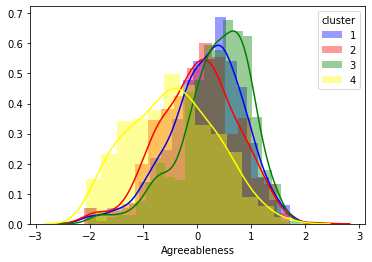

In [195]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_2[data_2.k_means_cluster == 0]["Agreeableness"], 
             color="blue", label=1)

sns.distplot(data_2[data_2.k_means_cluster == 1]["Agreeableness"], 
             color="red", label=2)

sns.distplot(data_2[data_2.k_means_cluster == 2]["Agreeableness"], 
             color="green", label=3)

sns.distplot(data_2[data_2.k_means_cluster == 3]["Agreeableness"], 
             color="yellow", label=4)

plt.legend(title="cluster")
plt.show()

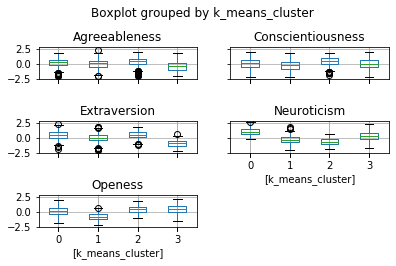

In [189]:
# 시각화방법 2
import matplotlib.pyplot as plt
data_2.boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.title("Cluster별 Factor의 Box Plot")
plt.show()

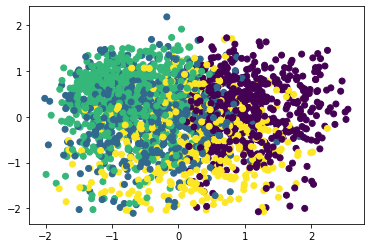

In [174]:
# 군집결과 시각화
plt.scatter(x=data_2['Neuroticism'], y=data_2['Agreeableness'], c=data_2['k_means_cluster'])

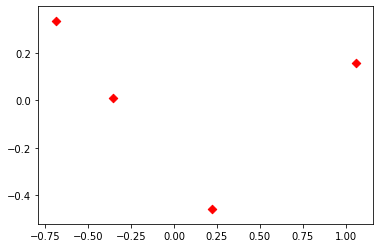

In [175]:
# 군집별 중앙값 시각화
plt.scatter(x=centers[:,0], y=centers[:,3], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

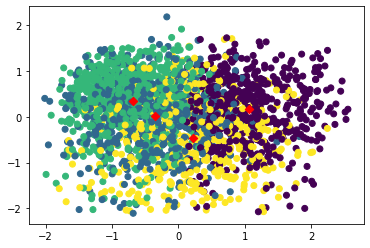

In [176]:
# 군집결과와 중앙값 함께 시각화

plt.scatter(x=data_2['Neuroticism'], y=data_2['Agreeableness'], c=data_2['k_means_cluster']) 

plt.scatter(x=centers[:,0], y=centers[:,3], marker='D', c='r')
plt.show()

In [177]:
from sklearn.metrics import silhouette_samples, silhouette_score
k_score_samples = silhouette_samples(data_2, data_2['k_means_cluster'])

data_2['k_silhouette_coeff'] = k_score_samples
k_average_score = silhouette_score(data_2, data_2['k_means_cluster'])
print('데이터셋 Silhouette Analysis Score:{0:.3f}'.format(k_average_score))

데이터셋 Silhouette Analysis Score:0.263


In [178]:
# 군집별 평균 silhouette_score 값
data_2.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.278526
1    0.206476
2    0.313379
3    0.237247
Name: k_silhouette_coeff, dtype: float64

참고:

https://computer-nerd.tistory.com/49

https://yganalyst.github.io/data_handling/Pd_5/

https://hwi-doc.tistory.com/entry/IQR-%EB%B0%A9%EC%8B%9D%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EC%83%81%EC%B9%98-%EB%8D%B0%EC%9D%B4%ED%84%B0Outlier-%EC%A0%9C%EA%B1%B0

https://mindscale.kr/course/python-visualization-basic/dist/

https://joyfuls.tistory.com/64

https://bcho.tistory.com/1204

https://ariz1623.tistory.com/224

https://datastore-of-pren-k.tistory.com/9

https://blog.naver.com/th9231/221985961321

https://rfriend.tistory.com/409

https://datascienceschool.net/01%20python/05.05%20%ED%8C%90%EB%8B%A4%EC%8A%A4%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B8%B0%EB%8A%A5.html